<a href="https://colab.research.google.com/github/fedakhalid/DataEngineering1/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.impute import SimpleImputer
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.models.widgets import Tabs,Panel
output_notebook()

Most cars on sale were produced after 1990
CO2 emission and displacement are positively correlated
Price and production year are positvely strongly correlated
Horse power and production year are positively correlated
Mileage has a very low variance
Displacement and production year are positively correlated
Horse power and price are positively correlated
Horse Power and displacement are positively related

In [92]:
df = pd.read_csv('/content/Car_sale_ads.csv', engine='python', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
df.isnull().sum().sort_values()

Index                           0
Offer_publication_date          0
Colour                          0
Type                            0
Offer_location                  0
Production_year                 0
Fuel_type                       0
Features                        0
Vehicle_model                   0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Transmission                  479
Power_HP                      643
Mileage_km                    983
Doors_number                 1487
Displacement_cm3             1966
Drive                       15076
Vehicle_generation          60444
Vehicle_version             70222
Origin_country              89992
CO2_emissions              114257
First_registration_date    121859
First_owner                143210
dtype: int64

In [ ]:
df[df['First_registration_date'].isnull()].head(20)

Index   Price Currency Condition Vehicle_brand Vehicle_model  \
0       0   86200      PLN       New        Abarth           595   
1       1   43500      PLN      Used        Abarth         Other   
2       2   44900      PLN      Used        Abarth           500   
3       3   39900      PLN      Used        Abarth           500   
4       4   97900      PLN       New        Abarth           595   
7       7   69900      PLN      Used        Abarth           500   
8       8  120750      PLN       New        Abarth           595   
9       9   93100      PLN       New        Abarth           595   
10     10   67000      PLN      Used        Abarth           595   
13     13   38500      PLN      Used        Abarth           500   
16     16   80900      PLN       New        Abarth           595   
17     17  127921      PLN       New        Abarth           595   
18     18   70900      PLN      Used        Abarth           595   
20     20   75500      PLN      Used        Abarth           595   
21     21   92000      PLN      Used        Abarth           124   
22     22   69000      PLN      Used        Abarth           595   
23     23   54200      PLN      Used        Abarth           595   
27     27   86990      PLN       New        Abarth           595   
28     28  119990      PLN       New        Abarth           595   
29     29   98900      PLN       New        Abarth           595   

   Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0              NaN                NaN             2021         1.0  ...   
1              NaN                NaN             1974     59000.0  ...   
2              NaN                NaN             2018     52000.0  ...   
3              NaN                NaN             2012     29000.0  ...   
4              NaN                NaN             2021       600.0  ...   
7              NaN                NaN             2019     20000.0  ...   
8              NaN                NaN             2021         1.0  ...   
9              NaN                NaN             2021         1.0  ...   
10             NaN                NaN             2018     38000.0  ...   
13             NaN                NaN             2015    117000.0  ...   
16             NaN                NaN             2020         1.0  ...   
17             NaN                NaN             2021         3.0  ...   
18             NaN                NaN             2019     11000.0  ...   
20             NaN                NaN             2019      6500.0  ...   
21    1.4 MultiAir                NaN             2016      7200.0  ...   
22             NaN                NaN             2018     22000.0  ...   
23             NaN                NaN             2013     22000.0  ...   
27             NaN                NaN             2021         NaN  ...   
28             NaN                NaN             2020         NaN  ...   
29             NaN                NaN             2021         NaN  ...   

    Transmission         Type Doors_number  Colour Origin_country First_owner  \
0         Manual   small_cars          3.0    gray            NaN         NaN   
1         Manual        coupe          2.0  silver            NaN         NaN   
2      Automatic   small_cars          3.0  silver            NaN         NaN   
3         Manual   small_cars          3.0    gray            NaN         NaN   
4         Manual   small_cars          3.0    blue            NaN         NaN   
7         Manual   small_cars          3.0   white         Poland         Yes   
8         Manual   small_cars          3.0    blue            NaN         NaN   
9         Manual   small_cars          3.0    gray            NaN         NaN   
10        Manual   small_cars          3.0   white         Poland         NaN   
13        Manual    city_cars          3.0    gray            NaN         Yes   
16        Manual   small_cars          3.0     red            NaN         NaN   
17        Manual   small_ca

Notice how First_registration_date has the same year as Production_year

---



we are gonna assume cars who drove more than q1 of mileage km have First_registration_date year same Production_year and random month and day(since they will not make difference)
and the rest are unregistered

In [94]:
df['First_registration_date'] = df[df['Mileage_km'] <= 53588.75]['First_registration_date'].fillna('Unregistered')

In [95]:
def isValideDay(month ,day) :
  if(month == 9 or month== 4 or month ==6 or month== 11 or month == 2):
    if(day == 31) :
      return False
  if(month == 2 and day > 28):
    return False
  return True


In [96]:
month = random.randint(1,12)
day = random.randint(1,31)
while not isValideDay(month ,day) :
  month = random.randint(1,12)
  day = random.randint(1,31)

date = str(day) + '/' + str(month) + '/'
df['First_registration_date'] = df['First_registration_date'].fillna(date + str(df['Production_year']) )

In [22]:
df.isnull().sum().sort_values()

Index                           0
Offer_publication_date          0
First_registration_date         0
First_owner                     0
Colour                          0
Doors_number                    0
Type                            0
Drive                           0
Offer_location                  0
Displacement_cm3                0
Fuel_type                       0
Mileage_km                      0
Production_year                 0
Vehicle_model                   0
Vehicle_brand                   0
Condition                       0
Currency                        0
Price                           0
Features                        0
Transmission                  479
Power_HP                      643
Vehicle_generation          60444
Vehicle_version             70222
Origin_country              89992
CO2_emissions              114257
dtype: int64

In [ ]:
df[df['CO2_emissions'].notnull()].iloc[:,1:20]


Price Currency Condition Vehicle_brand Vehicle_model  \
3        39900      PLN      Used        Abarth           500   
5        62950      PLN      Used        Abarth           595   
7        69900      PLN      Used        Abarth           500   
18       70900      PLN      Used        Abarth           595   
20       75500      PLN      Used        Abarth           595   
...        ...      ...       ...           ...           ...   
208247   81500      PLN      Used         Volvo         XC 70   
208251  129900      PLN      Used         Volvo           V60   
208254   91900      PLN      Used         Volvo           V60   
208256   18900      PLN      Used         Volvo           V50   
208270   24900      PLN      Used         Volvo           V70   

                    Vehicle_version Vehicle_generation  Production_year  \
3                               NaN                NaN             2012   
5                               NaN                NaN             2016   
7                               NaN                NaN             2019   
18                              NaN                NaN             2019   
20                              NaN                NaN             2019   
...                             ...                ...              ...   
208247      T6 AWD Dynamic Momentum                NaN             2014   
208251                  D3 Momentum                NaN             2019   
208254  Cross Country T5 Geartronic                NaN             2017   
208256               1.6D DPF DRIVe                NaN             2009   
208270                         2.0D        III (2007-)             2008   

        Mileage_km  Power_HP  Displacement_cm3 Fuel_type  CO2_emissions  \
3          29000.0     160.0            1368.0  Gasoline          139.0   
5          46060.0     180.0            1368.0  Gasoline          139.0   
7          20000.0     145.0            1368.0  Gasoline          139.0   
18         11000.0     145.0            1368.0  Gasoline          154.0   
20          6500.0     180.0            1368.0  Gasoline          171.0   
...            ...       ...               ...       ...            ...   
208247     91000.0     304.0            2953.0  Gasoline          248.0   
208251     37000.0     150.0            1969.0    Diesel          114.0   
208254     31000.0     245.0            1969.0  Gasoline          153.0   
208256    226732.0     109.0            1560.0    Diesel          119.0   
208270    262000.0     136.0            1998.0    Diesel          157.0   

                               Drive Transmission           Type  \
3                       Front wheels       Manual     small_cars   
5                       Front wheels       Manual     small_cars   
7                       Front wheels       Manual     small_cars   
18                      Front wheels       Manual     small_cars   
20                      Front wheels       Manual      city_cars   
...                              ...          ...            ...   
208247  4x4 (attached automatically)    Automatic            SUV   
208251                  Front wheels    Automatic  station_wagon   
208254                  Front wheels    Automatic  station_wagon   
208256                  Front wheels       Manual  station_wagon   
208270                  Front wheels       Manual  station_wagon   

        Doors_number  Colour Origin_country  
3                3.0    gray            NaN  
5                3.0    gray        Germany  
7                3.0   white         Poland  
18               2.0  yellow         Poland  
20               3.0   black        Germany  
...              ...     ...            ...  
208247           5.0  golden            NaN  
208251           5.0   black            NaN  
208254           5.0   black    Netherlands  
208256           5.0   black        Belgium  
208270           5.0   other        Belgium  

[94047 rows x 19 columns]

In [3]:
# errors = []

# for k in range(1, 20, 2):
#   rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
#   imputer = KNNImputer(n_neighbors=k)
#   imputed = imputer.fit_transform(columns=df2.columns)
#   df_imputed = pd.DataFrame(imputed, columns=df2.columns )
#   X = df_imputed.drop(['CO2_emissions'], axis=1)
#   y = df_imputed['CO2_emissions']
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   model = RandomForestRegressor()
#   model.fit(X_train, y_train)
#   preds = model.predict(X_test)
#   error = rmse(y_test, preds)
#   errors.append({'K': k, 'RMSE': error})
  
# print(errors)



to predict best value for k but it is taking alot of time so we are gonna asume best value is 3

first let's create a copy of dataframa and drop columns that are object

In [97]:
df2 = df.copy()
df2 = df2.drop('Currency', axis=1)
df2 = df2.drop('Condition', axis=1)
df2 = df2.drop('Vehicle_brand', axis=1)
df2 = df2.drop('Vehicle_model', axis=1)
df2 = df2.drop('Vehicle_version', axis=1)
df2 = df2.drop('Vehicle_generation', axis=1)
df2 = df2.drop('Fuel_type', axis=1)
df2 = df2.drop('Drive', axis=1)
df2 = df2.drop('Transmission', axis=1)
df2 = df2.drop('Type', axis=1)
df2 = df2.drop('Colour', axis=1)
df2 = df2.drop('Origin_country', axis=1)
df2 = df2.drop('First_owner', axis=1)
df2 = df2.drop('First_registration_date', axis=1)
df2 = df2.drop('Offer_location', axis=1)
df2 = df2.drop('Features', axis=1)
df2 = df2.drop('Offer_publication_date', axis =1)

In [98]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df2)
df_imputed = pd.DataFrame(imputed, columns=df2.columns)

In [26]:
df_imputed.head(10)

Index     Price  Production_year  Mileage_km  Power_HP  Displacement_cm3  \
0    0.0   86200.0           2021.0         1.0     145.0            1400.0   
1    1.0   43500.0           1974.0     59000.0      75.0            1100.0   
2    2.0   44900.0           2018.0     52000.0     180.0            1368.0   
3    3.0   39900.0           2012.0     29000.0     160.0            1368.0   
4    4.0   97900.0           2021.0       600.0     165.0            1368.0   
5    5.0   62950.0           2016.0     46060.0     180.0            1368.0   
6    6.0   69900.0           2021.0      2900.0     145.0            1368.0   
7    7.0   69900.0           2019.0     20000.0     145.0            1368.0   
8    8.0  120750.0           2021.0         1.0     180.0            1368.0   
9    9.0   93100.0           2021.0         1.0     145.0            1398.0   

   CO2_emissions  Doors_number  
0     110.000000           3.0  
1     125.000000           2.0  
2     124.333333           3.0  
3     139.000000           3.0  
4     105.666667           3.0  
5     139.000000           3.0  
6     144.666667           2.0  
7     139.000000           3.0  
8     109.666667           3.0  
9     109.333333           3.0

In [27]:
df['CO2_emissions'] = df_imputed['CO2_emissions']
df.isnull().sum().sort_values()

Index                          0
Offer_publication_date         0
First_registration_date        0
First_owner                    0
Colour                         0
Doors_number                   0
Type                           0
Drive                          0
CO2_emissions                  0
Offer_location                 0
Displacement_cm3               0
Fuel_type                      0
Mileage_km                     0
Production_year                0
Vehicle_model                  0
Vehicle_brand                  0
Condition                      0
Currency                       0
Price                          0
Features                       0
Transmission                 479
Power_HP                     643
Vehicle_generation         60444
Vehicle_version            70222
Origin_country             89992
dtype: int64

In [100]:
df.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
0        Manual  small_cars          3.0    gray            NaN          No   
1        Manual       coupe          2.0  silver            NaN          No   
2     Automatic  small_cars          3.0  silver            NaN          No   
3        Manual  small_cars          3.0    gray            NaN          No   
4        Manual  small_cars          3.0    blue            NaN          No   

                             First_registration_date  Offer_publication_date  \
0                                       Unregistered              04/05/2021   
1  23/2/0         2021\n1         1974\n2        ...              03/05/2021   
2                                       Unregistered              03/05/2021   
3                                       Unregistered              30/04/2021   
4                                       Unregistered              30/04/2021   

                                      Offer_location  \
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...   
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...   

                                            Features  
0                                                 []  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
4  ['ABS', 'Electrically adjustable mirrors', 'Pa...  

[5 rows x 25 columns]

In [18]:
df.isnull().sum().sort_values()

Index                           0
Offer_publication_date          0
First_owner                     0
Colour                          0
Doors_number                    0
Type                            0
Drive                           0
Offer_location                  0
Displacement_cm3                0
Fuel_type                       0
Production_year                 0
Vehicle_model                   0
Vehicle_brand                   0
Condition                       0
Currency                        0
Price                           0
Mileage_km                      0
Features                        0
Transmission                  479
Power_HP                      643
Vehicle_generation          60444
Vehicle_version             70222
Origin_country              89992
CO2_emissions              114257
First_registration_date    121859
dtype: int64

Now for Vehicle_generation, Vehicle_version and Origin_country we will fill it using fill method 

In [93]:
df['Mileage_km']= df['Mileage_km'].fillna(df['Mileage_km'].mean())
df['Displacement_cm3']= df['Displacement_cm3'].fillna(df['Displacement_cm3'].median())
df['Doors_number']= df['Doors_number'].fillna(df['Doors_number'].mode()[0])
df['Drive']= df['Drive'].fillna(df['Drive'].mode()[0])
df['First_owner']= df['First_owner'].fillna('No')
df['Transmission']= df['Transmission'].fillna(method='bfill')
df['Power_HP'] = df['Power_HP'].fillna(df['Power_HP'].median())

In [29]:
df['Origin_country'] = df['Origin_country'].fillna(method='ffill')

Now for the visualization part
q1 : plot data between co2 emission and mileage_km 

In [30]:

hover = HoverTool(tooltips = [("Mile driven in km","@Mileage_km"),("Co2 emission","@CO2_emissions"), ("Brand of vehicle","@Vehicle_brand")])
plot = figure(x_axis_label = "x",y_axis_label = "y")
plot.add_tools(HoverTool())
x = df['Mileage_km']
y = df['CO2_emissions']
plot.circle(x=x ,y=y , fill_color = "yellow",size = 10)
show(plot)


it is clear we have extreme outliers so let's plot data without outlier

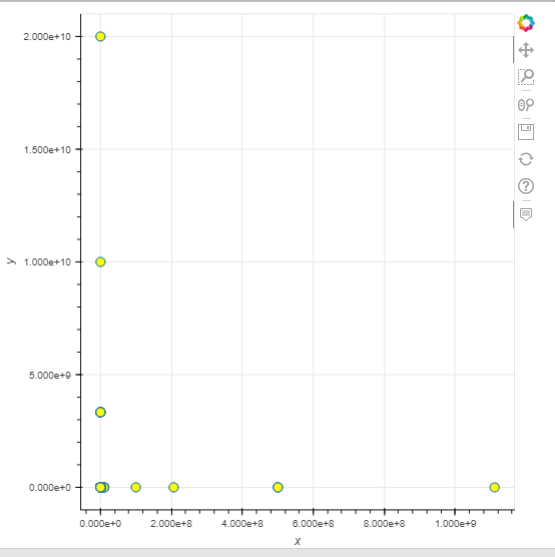

In [147]:
df2 = df.copy()
data =df[df['Mileage_km'] < 205697.5]
#df2= df2.drop(data, axis=1)
#source = ColumnDataSource(df2)
plot = figure(x_axis_label = "mile in km",y_axis_label = "co2")
plot.add_tools(HoverTool())
x = df[df['Mileage_km'] < 105691.5]['Mileage_km']
y = df[df['CO2_emissions'] < 90000]['CO2_emissions']
plot.circle(x=x ,y=y ,  fill_color = "yellow",size = 10)
show(plot)
print('l')

l


As we can there is no relation

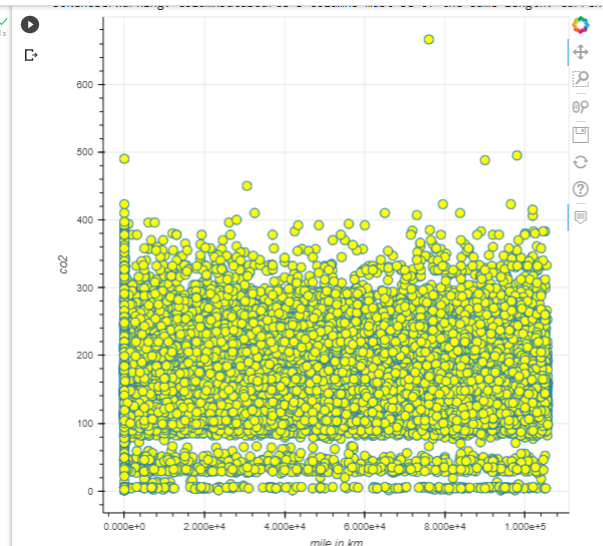

q2: What is the relation between power hp and fuel type and how does it affect co2 emissions

In [108]:
df2 =df.copy()
df2 = df2[df2['CO2_emissions'] < 20000] #to make grapgh more readable remove extreme outliers
y =df2[df2['Fuel_type']=='Gasoline'].Power_HP.values
x=df2[df2['Fuel_type']=='Gasoline'].CO2_emissions.values
plot = figure()
plot.plot_height=400
plot.plot_width=800
plot.circle(x= x, y=y ,size=10, color='black', legend_label='Gasoline')
plot.cross(x=df2[df2['Fuel_type']=='Diesel'].CO2_emissions.values, y =df2[df2['Fuel_type']=='Diesel'].Power_HP.values ,size=10, color='red', legend_label='Diesel')
plot.circle(x=df2[df2['Fuel_type']=='Gasoline + LPG'].CO2_emissions.values, y =df2[df2['Fuel_type']=='Gasoline + LPG'].Power_HP.values ,size=10, color='blue', legend_label='Gasoline + LPG')
show(plot)

it it clear that gasoline has the highest co2 emissions and diesel has the highest power hp
the relation between power hp and co2 emissions is positive

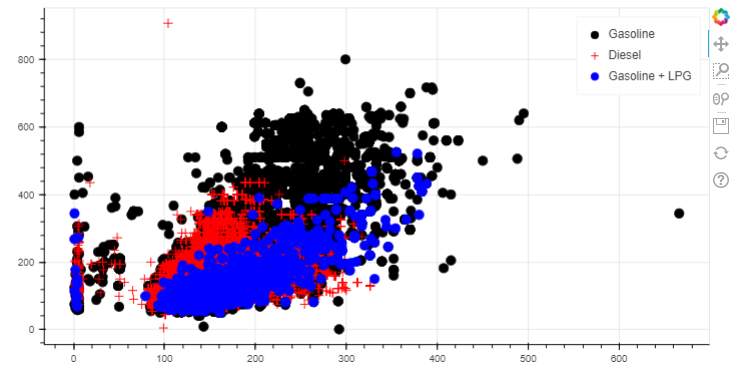

q3: which country produce the most number of cars (answered in trial.ipynb)

q4: specify each brand vehicle and number of  colors for audi and bmw

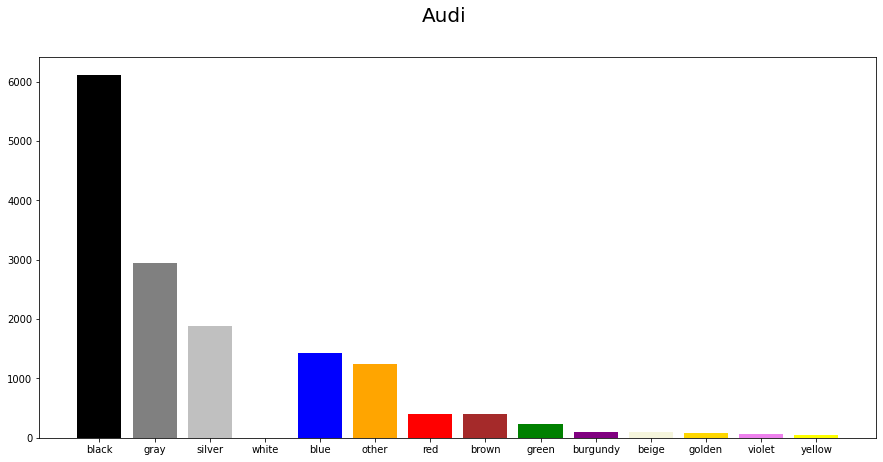

In [116]:
fig1 = plt.figure(figsize=(15, 7))

width = 0.2

h = df[df['Vehicle_brand'] == 'Audi']['Colour'].value_counts()
fig1.suptitle('Audi', fontsize=20 )
fig1 =plt.bar(h.index, h.values, color=('black','gray','silver','white','blue','orange','red','brown','green','purple','beige','gold','violet','yellow'))




#ax.bar(height=)

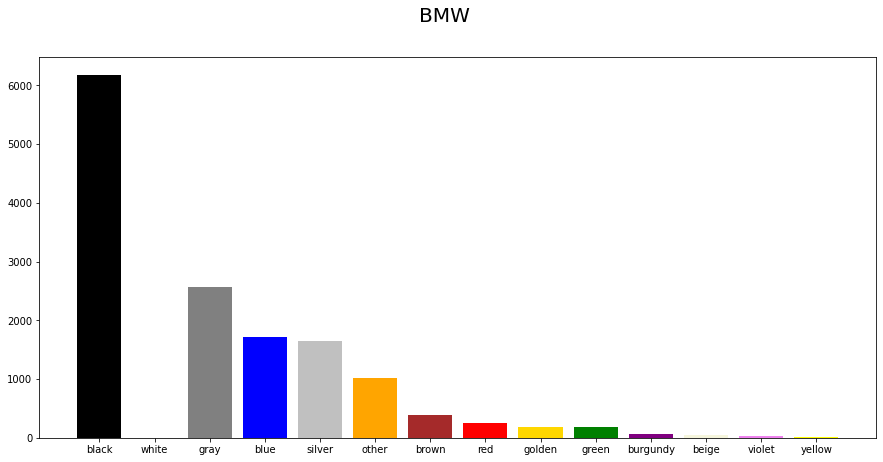

In [117]:
fig = plt.figure(figsize=(15, 7))

width = 0.2
h2 = df[df['Vehicle_brand'] == 'BMW']['Colour'].value_counts()
fig.suptitle('BMW', fontsize=20 )
fig= plt.bar(h2.index, h2.values, color=('black','white','gray','blue','silver','orange','brown','red','gold','green','purple','beige','violet','yellow'), )

In [85]:
df['Fuel_type'].value_counts()
df['CO2_emissions'].max()

20000000000.0

are the prices relevant to used or new car

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Used cars')]

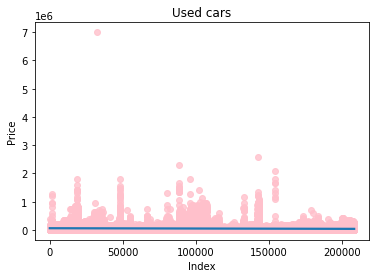

In [122]:
sns.regplot(df[df['Condition'] =='Used'].Index, df[df['Condition'] =='Used'].Price, line_kws={"color": "pink"}).set(title='Used cars')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'New cars')]

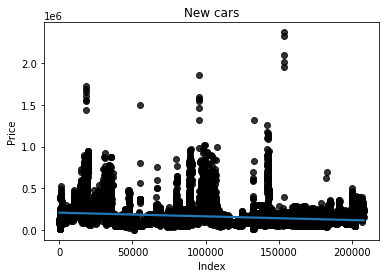

In [123]:
sns.regplot(df[df['Condition'] =='New'].Index, df[df['Condition'] =='New'].Price, scatter_kws={"color": "black"}).set(title='New cars')

price is higher when it comes to used cars

what is the most expensive advertised car and the cheapest (answered in trial.ipynb)